## KORA_S3S4 Data Analysis - Minimum Model - Baseline

In [22]:
import numpy as np
import pandas as pd
import DiagnosticPlots
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import scale
import statsmodels.api as sts
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 
## Loading the data
### 

In [65]:
data_path = '../../Data/KORA_S3_S4/KORA_Noise_CleanData_MiniModel.csv'
data = pd.read_csv(data_path)

In [77]:
# Splitting data to numeric and categoric to scale the numerica data and to map categoric data in order to
# make the implementation and results more consistence with r

Data_numeric = data[['age', 'bmi', 'lden_org', 'bp_syst']]
Data_categoric = data[['sex', 'smoking']]

Data_categoric['smoking']= Data_categoric['smoking'].map({1.0:'Current', 2.0:'Ex_smoker', 3.0:'Never_smoker'})
Data_categoric['sex']= Data_categoric['sex'].map({0.0:'female', 1.0:'male'})

Data_categoric.head()

,sex,smoking
0,female,Ex_smoker
1,male,Ex_smoker
2,male,Never_smoker
3,female,Current
4,female,Ex_smoker


In [67]:
# scale numeric data
Data_numeric_scaled = pd.DataFrame(scale(Data_numeric), index=Data_numeric.index,
                           columns=Data_numeric.columns)
print(Data_numeric.head())
print(Data_numeric_scaled.head())

    age    bmi  lden_org  bp_syst
0  31.0  18.94      41.0    106.0
1  40.0  27.14      55.2    143.0
2  59.0  30.34      55.2    164.0
3  62.0  19.46      46.8    109.0
4  62.0  31.25      51.2    113.0
        age       bmi  lden_org   bp_syst
0 -1.322331 -1.779564 -2.091145 -1.256215
1 -0.680971  0.005424  0.072188  0.637412
2  0.673013  0.702005  0.072188  1.712172
3  0.886799 -1.666370 -1.207530 -1.102678
4  0.886799  0.900095 -0.537202 -0.897961


In [68]:
# concatinating data
Data = pd.concat([Data_numeric, Data_categoric], axis= 1)
Data_scaled = pd.concat([Data_numeric_scaled, Data_categoric], axis= 1)
print(Data.head())
print(Data_scaled.head())

    age    bmi  lden_org  bp_syst     sex       smoking
0  31.0  18.94      41.0    106.0  female     Ex_smoker
1  40.0  27.14      55.2    143.0    male     Ex_smoker
2  59.0  30.34      55.2    164.0    male  Never_smoker
3  62.0  19.46      46.8    109.0  female       Current
4  62.0  31.25      51.2    113.0  female     Ex_smoker
        age       bmi  lden_org   bp_syst     sex       smoking
0 -1.322331 -1.779564 -2.091145 -1.256215  female     Ex_smoker
1 -0.680971  0.005424  0.072188  0.637412    male     Ex_smoker
2  0.673013  0.702005  0.072188  1.712172    male  Never_smoker
3  0.886799 -1.666370 -1.207530 -1.102678  female       Current
4  0.886799  0.900095 -0.537202 -0.897961  female     Ex_smoker


In [69]:
Data = pd.get_dummies(data=Data, drop_first=True)
print(Data.head())

Data_scaled = pd.get_dummies(data=Data_scaled, drop_first=True)
print(Data_scaled.head())

    age    bmi  lden_org  bp_syst  sex_male  smoking_Ex_smoker  \
0  31.0  18.94      41.0    106.0         0                  1   
1  40.0  27.14      55.2    143.0         1                  1   
2  59.0  30.34      55.2    164.0         1                  0   
3  62.0  19.46      46.8    109.0         0                  0   
4  62.0  31.25      51.2    113.0         0                  1   

   smoking_Never_smoker  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0  
        age       bmi  lden_org   bp_syst  sex_male  smoking_Ex_smoker  \
0 -1.322331 -1.779564 -2.091145 -1.256215         0                  1   
1 -0.680971  0.005424  0.072188  0.637412         1                  1   
2  0.673013  0.702005  0.072188  1.712172         1                  0   
3  0.886799 -1.666370 -1.207530 -1.102678         0                  0   
4  0.886799  0.900095 -0.537202 -0.897961         0                  1   

  

In [70]:
# make the formular
variables = Data.columns.drop('bp_syst')
formula = ' + '.join(variables)
formula = 'bp_syst ~ ' + formula
print(formula)

bp_syst ~ age + bmi + lden_org + sex_male + smoking_Ex_smoker + smoking_Never_smoker


In [71]:
# OLS for original data

# mod = smf.quantreg(formula, Data)
mod = smf.ols(formula, Data)
res = mod.fit()
print(res.summary())
file = open('regression_estimates.txt', 'w')
file.write(str(res.summary()))
file.close()

                            OLS Regression Results                            
Dep. Variable:                bp_syst   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     550.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:03:44   Log-Likelihood:                -38621.
No. Observations:                9116   AIC:                         7.726e+04
Df Residuals:                    9109   BIC:                         7.731e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               77.6768 

In [72]:
# computing the changes for one unit increase in any feature


unit = 1
res.change = (np.exp(res.params * unit)-1) * 100
res.change.name='Change'

res.change_LL = (np.exp((res.params - 1.96 * res.bse)*unit)-1)*100
res.change_LL.name='Change_LL'

res.change_UL = (np.exp((res.params + 1.96 * res.bse)*unit)-1)*100
res.change_UL.name='Change_UL'

summary = pd.concat([res.change, res.change_LL, res.change_UL, res.params, res.bse, res.tvalues, res.pvalues],
                    names=['Change', 'Change_LL', 'Change_UL', 'Estimate', 'SD', 't', 'p'], axis = 1)
summary.to_excel('output/Linear Regression/LR_results_python.xlsx',
                 header= ['Change', 'Change_LL', 'Change_UL', 'Estimate', 'SD', 't', 'p'])
print(summary)

                            Change     Change_LL     Change_UL          0  \
Intercept             5.427549e+35  1.507262e+34  1.954424e+37  77.676796   
age                   6.866095e+01  6.427688e+01  7.316201e+01   0.522720   
bmi                   1.105638e+02  9.458257e+01  1.278577e+02   0.744619   
lden_org              4.067043e+00 -1.256455e+00  9.677544e+00   0.039865   
sex_male              3.876377e+05  1.898560e+05  7.913493e+05   8.262914   
smoking_Ex_smoker    -3.297597e+01 -7.371301e+01  7.089145e+01  -0.400119   
smoking_Never_smoker  3.530137e+02  8.502603e+01  1.009149e+03   1.510752   

                             1          2              3  
Intercept             1.828458  42.482128   0.000000e+00  
age                   0.013437  38.900605  2.238293e-306  
bmi                   0.040272  18.489928   5.797234e-75  
lden_org              0.026790   1.488035   1.367762e-01  
sex_male              0.364049  22.697235  5.488189e-111  
smoking_Ex_smoker     0.47753

In [73]:
# OLS for scaled data

mod_scaled = smf.ols(formula, Data_scaled)
res_scaled = mod_scaled.fit()
print(res_scaled.summary())
file = open('regression_estimates_scaled.txt', 'w')
file.write(str(res_scaled.summary()))
file.close()

                            OLS Regression Results                            
Dep. Variable:                bp_syst   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     550.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:03:45   Log-Likelihood:                -11524.
No. Observations:                9116   AIC:                         2.306e+04
Df Residuals:                    9109   BIC:                         2.311e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2351 

In [74]:
#            percentage change for the log transformation of the outcome

unit = 1
res_scaled.change = (np.exp(res_scaled.params * unit)-1) * 100
res_scaled.change.name='Change'

res_scaled.change_LL = (np.exp((res_scaled.params - 1.96 * res_scaled.bse)*unit)-1)*100
res_scaled.change_LL.name='Change_LL'

res_scaled.change_UL = (np.exp((res_scaled.params + 1.96 * res_scaled.bse)*unit)-1)*100
res_scaled.change_UL.name='Change_UL'

summary_scaled = pd.concat([res_scaled.change, res_scaled.change_LL, res_scaled.change_UL, res_scaled.params,
                     res_scaled.bse, res_scaled.tvalues, res.pvalues],
                    names=['Change', 'Change_LL', 'Change_UL', 'Estimate', 'SD', 't', 'p'], axis = 1)

summary_scaled.to_excel('output/Linear Regression/LR_scaled_results_python.xlsx',
                 header= ['Change', 'Change_LL', 'Change_UL', 'Estimate', 'SD', 't', 'p'])
print(summary_scaled)

                         Change  Change_LL  Change_UL         0         1  \
Intercept            -20.947154 -24.158455 -17.599880 -0.235054  0.021158   
age                   45.558353  42.831020  48.337765  0.375407  0.009650   
bmi                   19.132634  16.942186  21.364111  0.175067  0.009468   
lden_org               1.348225  -0.423863   3.151849  0.013392  0.009000   
sex_male              52.636397  47.162945  58.313424  0.422888  0.018632   
smoking_Ex_smoker     -2.026948  -6.609465   2.780426 -0.020478  0.024440   
smoking_Never_smoker   8.038657   3.199296  13.104953  0.077319  0.023381   

                              2              3  
Intercept            -11.109270   0.000000e+00  
age                   38.900605  2.238293e-306  
bmi                   18.489928   5.797234e-75  
lden_org               1.488035   1.367762e-01  
sex_male              22.697235  5.488189e-111  
smoking_Ex_smoker     -0.837876   4.021222e-01  
smoking_Never_smoker   3.306890   9.4703

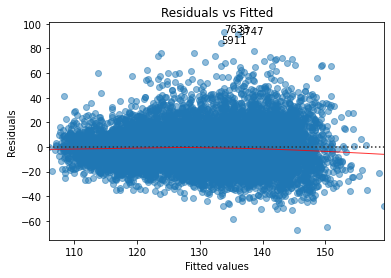

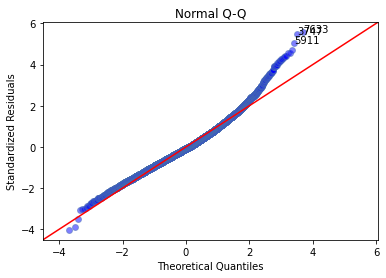

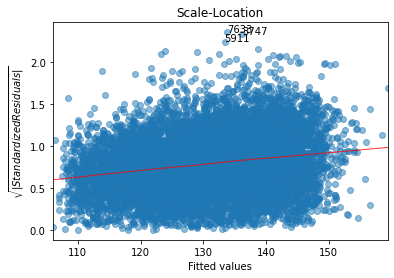

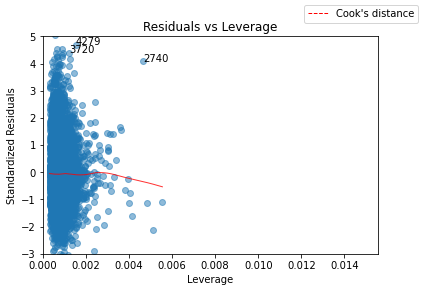

In [63]:
output = Data['bp_syst']
Covariates = Data.drop(['bp_syst'], axis = 1)
DiagnosticPlots.diagnostic_plots(Covariates, output)

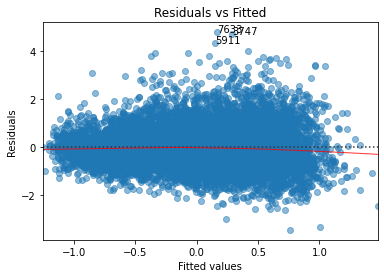

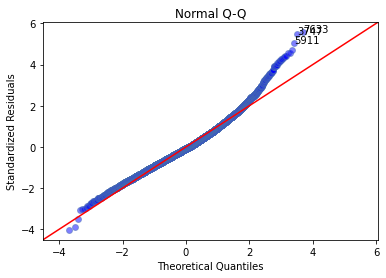

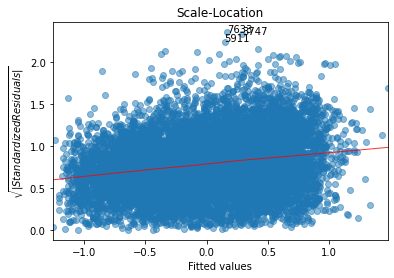

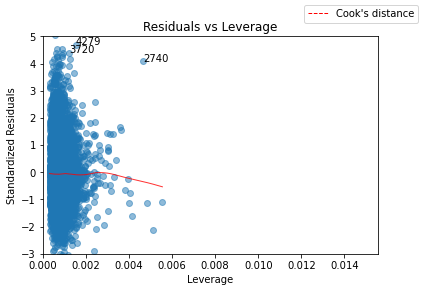

In [64]:
output_scaled = Data_scaled['bp_syst']
Covariates_scaled = Data_scaled.drop(['bp_syst'], axis = 1)
DiagnosticPlots.diagnostic_plots(Covariates_scaled, output_scaled)